In [142]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the restaurant data
df = pd.read_csv(R"D:\MY CLASS\Python datasets\Zomato Data\zomato.csv")

In [141]:
# Data preprocessing
# Convert 'rate' to numeric (removing '/5' and handling non-numeric values)
df['rate'] = pd.to_numeric(df['rate'].str.replace('/5', ''), errors='coerce')
# Convert 'approx_cost(for two people)' to numeric (removing commas)
df['approx_cost(for two people)'] = pd.to_numeric(
    df['approx_cost(for two people)'].str.replace(',', ''), errors='coerce')

# Handle missing values
df = df.dropna(subset=['rate', 'votes', 'approx_cost(for two people)'])

# Encode categorical variables
le = LabelEncoder()
df['online_order_encoded'] = le.fit_transform(df['online_order'])
df['book_table_encoded'] = le.fit_transform(df['book_table'])
df['location_encoded'] = le.fit_transform(df['location'])
df['rest_type_encoded'] = le.fit_transform(df['rest_type'])
# Define features and target
X = df[['votes', 'approx_cost(for two people)', 'online_order_encoded', 
        'book_table_encoded', 'location_encoded', 'rest_type_encoded']]
y = df['rate']


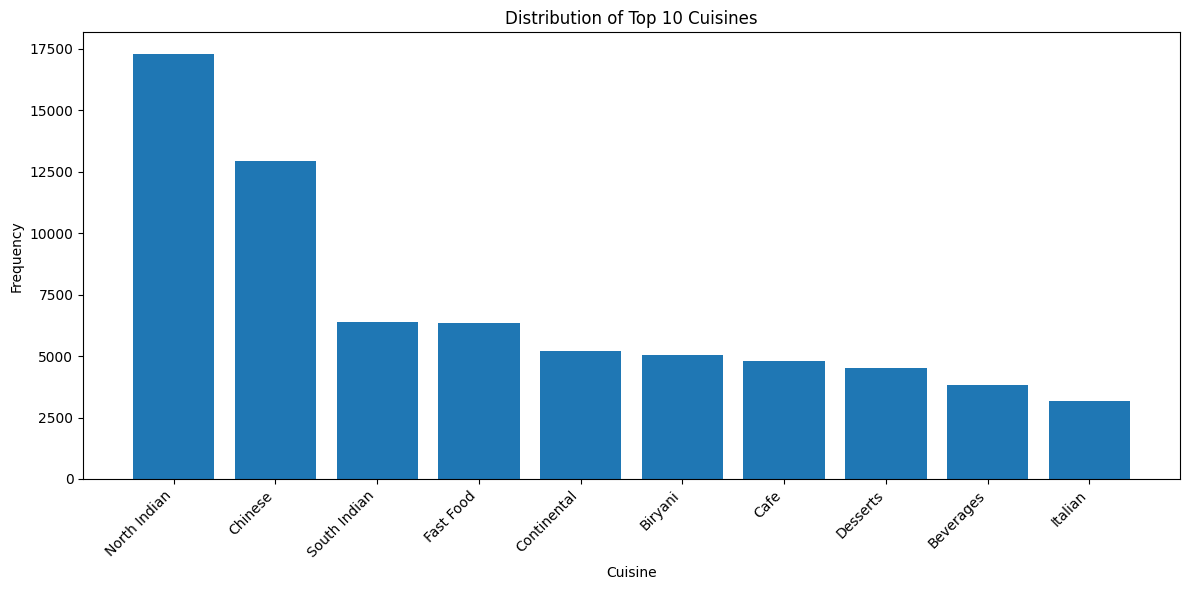

In [128]:
from collections import Counter
# Handle missing values in 'cuisines' column
df['cuisines'] = df['cuisines'].fillna('Unknown')

# Split cuisines and count frequencies
# Split each entry by comma and flatten the list
all_cuisines = [cuisine.strip() for entry in df['cuisines'] for cuisine in entry.split(',')]
cuisine_counts = Counter(all_cuisines)

# Convert to a DataFrame for easier plotting
cuisine_df = pd.DataFrame.from_dict(cuisine_counts, orient='index', columns=['Count'])
cuisine_df = cuisine_df.sort_values(by='Count', ascending=False).head(10)  # Top 10 cuisines

# Create the histogram (bar plot)
plt.figure(figsize=(12, 6))
plt.bar(cuisine_df.index, cuisine_df['Count'])
plt.title('Distribution of Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.savefig('cuisine_distribution.png')
plt.show()


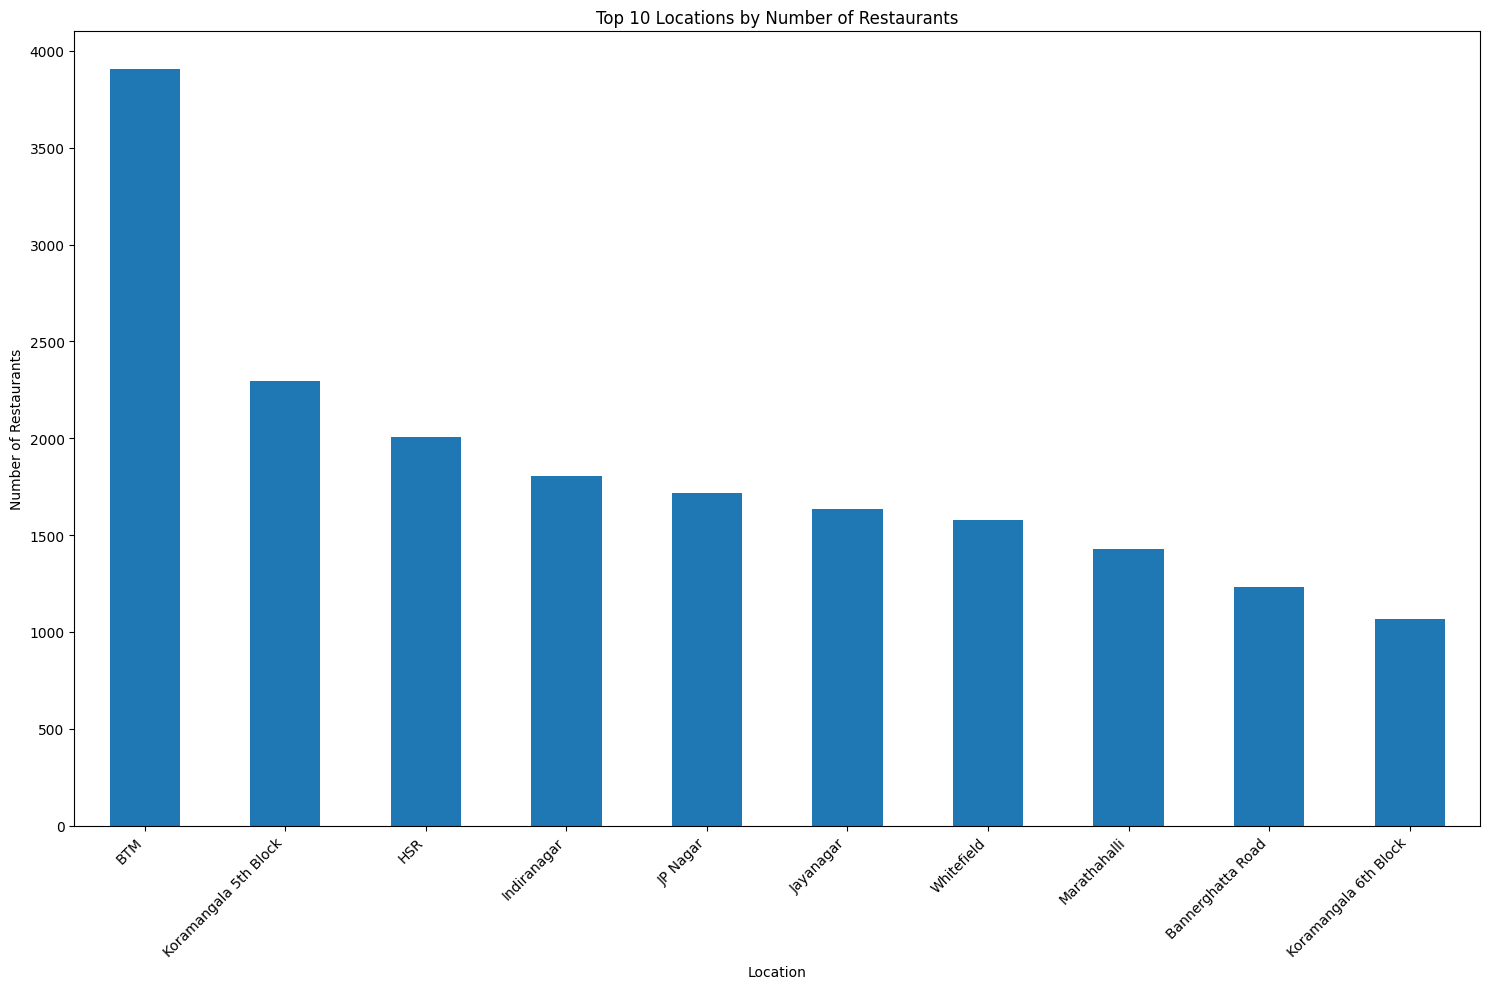

In [129]:
# Bar graph for Location
location_counts = df['location'].value_counts().head(10)  # Top 10 locations
rest_type_counts = df['rest_type'].value_counts().head(10)  # Top 10 restaurant types
online_order_counts = df['online_order'].value_counts()  # Yes/No

plt.figure(figsize=(15, 10))
location_counts.plot(kind='bar')
plt.title('Top 10 Locations by Number of Restaurants')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('restaurant_bar_graphs.png')
plt.show()


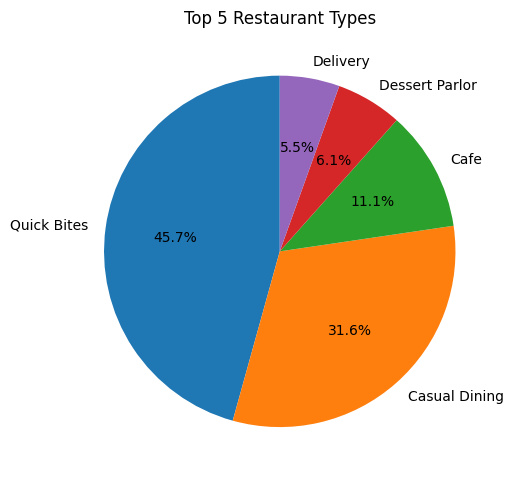

In [130]:
# Pie chart for Top 5 Restaurant Type
rest_type_counts = df['rest_type'].value_counts().head(5)
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)
plt.pie(rest_type_counts, labels=rest_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Restaurant Types')
plt.tight_layout()
plt.savefig('restaurant_pie_charts.png')
plt.show()


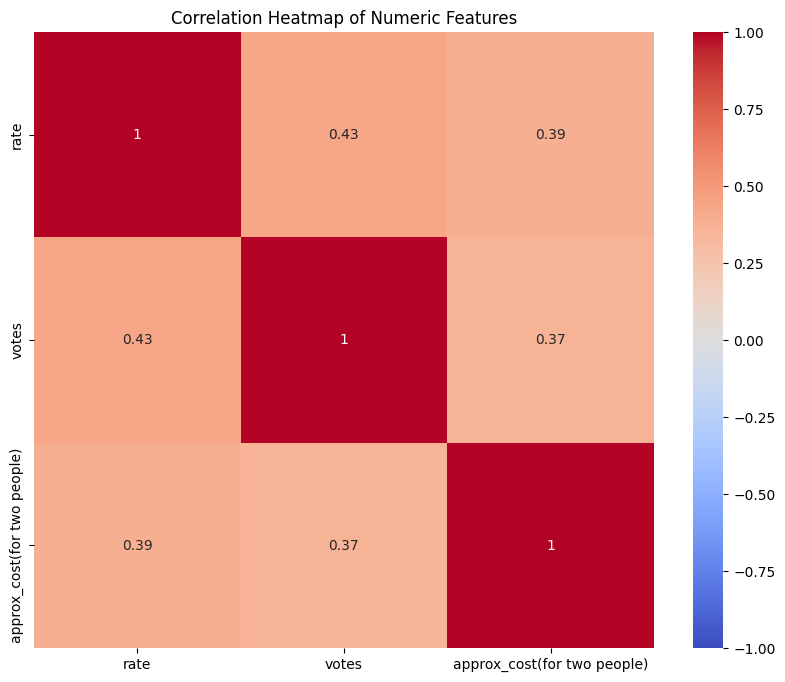

In [131]:
# Select numeric columns and drop rows with missing values
numeric_cols = ['rate', 'votes', 'approx_cost(for two people)']
# Calculate correlation matrix
correlation_matrix = numeric_df.corr()
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('restaurant_correlation_heatmap.png')
plt.show()


In [132]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train models
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
# Calculate regression metrics
metrics = {
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_pred)), 
             np.sqrt(mean_squared_error(y_test, rf_pred))],
    'MAE': [mean_absolute_error(y_test, lr_pred), 
            mean_absolute_error(y_test, rf_pred)]
}
metrics_df = pd.DataFrame(metrics)
print("Regression Performance Metrics:")
print(metrics_df)
metrics_df.to_csv('restaurant_model_metrics.csv', index=False)

Regression Performance Metrics:
               Model  R2 Score      RMSE       MAE
0  Linear Regression  0.287699  0.376040  0.288580
1      Random Forest  0.911212  0.132764  0.059356


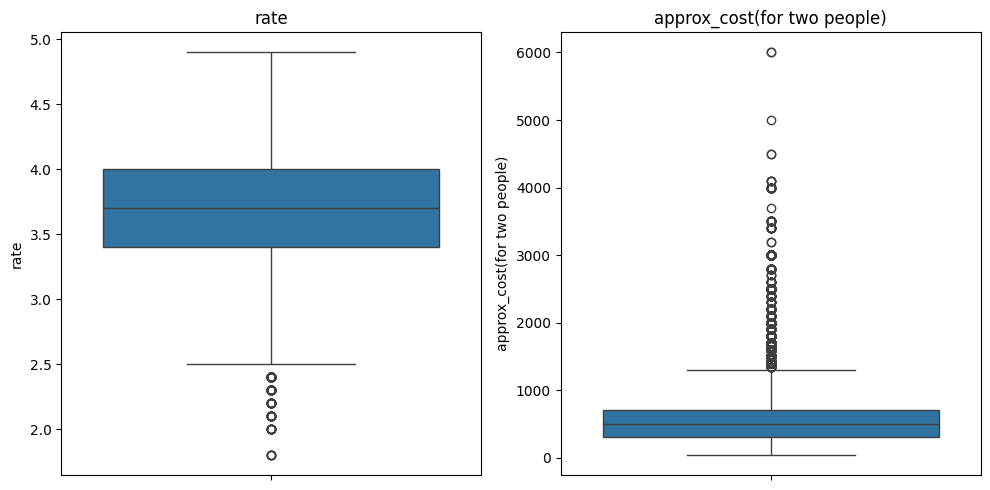

In [133]:
# Box Plots for Numeric Columns
numeric_cols = ['rate', 'approx_cost(for two people)']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'{col}')
plt.tight_layout()
plt.savefig('restaurant_boxplots.png')
plt.show()

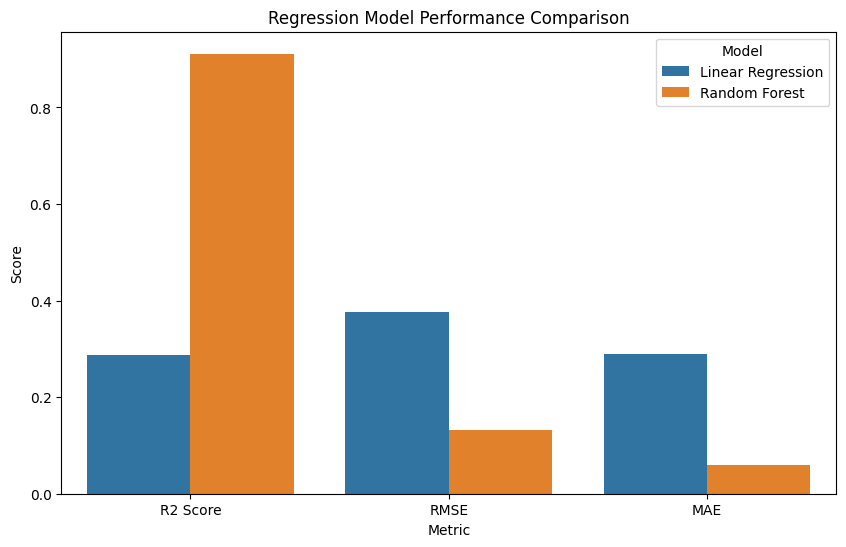

In [134]:
# Bar plot of regression metrics
plt.figure(figsize=(10, 6))
metrics_melted = metrics_df.melt(id_vars=['Model'], 
                                value_vars=['R2 Score', 'RMSE', 'MAE'],
                                var_name='Metric', 
                                value_name='Value')
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted)
plt.title('Regression Model Performance Comparison')
plt.ylabel('Score')
plt.savefig('restaurant_metrics_comparison.png')
plt.show()

In [135]:
# Convert continuous values to categories for confusion matrix
bins = np.quantile(y_test, [0, 0.25, 0.5, 0.75, 1.0])
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
lr_pred_binned = pd.cut(lr_pred, bins=bins, labels=labels, include_lowest=True)
rf_pred_binned = pd.cut(rf_pred, bins=bins, labels=labels, include_lowest=True)

# Ensure bins cover the full range of both actual and predicted values
all_values = np.concatenate([y_test, lr_pred, rf_pred])
bins = np.quantile(all_values, [0, 0.25, 0.5, 0.75, 1.0])
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']

# Add small buffer to min/max to ensure all values are included
bins[0] = min(all_values) - 0.01  # Lower bound
bins[-1] = max(all_values) + 0.01  # Upper bound

# Bin the values, handling NaN explicitly
y_test_binned = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True)
lr_pred_binned = pd.cut(lr_pred, bins=bins, labels=labels, include_lowest=True)
rf_pred_binned = pd.cut(rf_pred, bins=bins, labels=labels, include_lowest=True)

# Check for NaN values and replace with a default category if needed
y_test_binned = y_test_binned.fillna('Medium-Low')
lr_pred_binned = lr_pred_binned.fillna('Medium-Low')
rf_pred_binned = rf_pred_binned.fillna('Medium-Low')

# Calculate confusion matrices
lr_cm = confusion_matrix(y_test_binned, lr_pred_binned, labels=labels)
rf_cm = confusion_matrix(y_test_binned, rf_pred_binned, labels=labels)

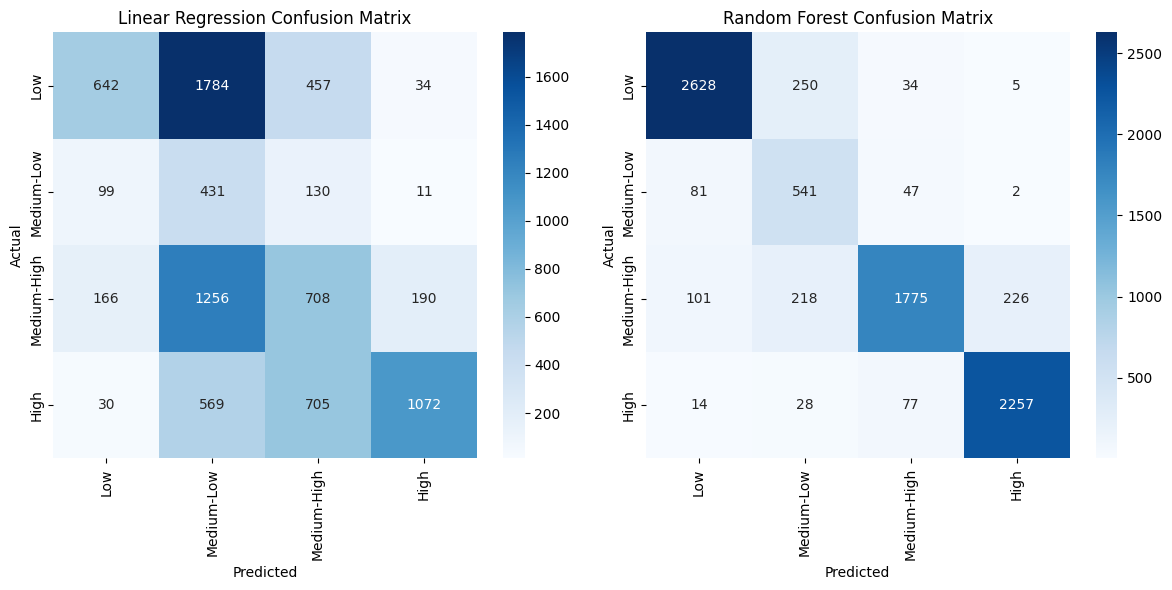

In [136]:
# Rest of the visualization code remains the same
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Linear Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('restaurant_confusion_matrices.png')
plt.show()

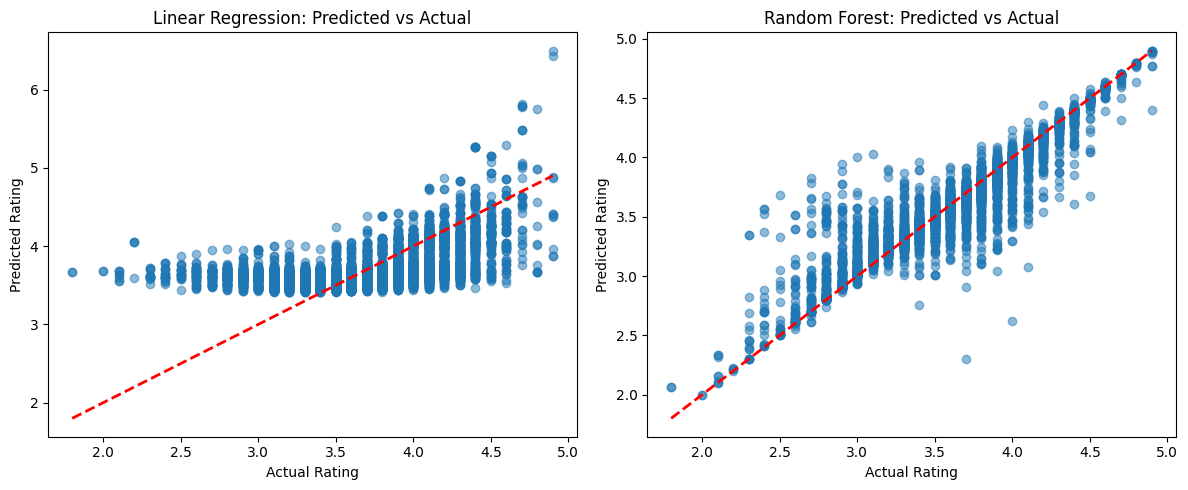

In [137]:
# Predicted vs Actual scatter plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Linear Regression: Predicted vs Actual')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.savefig('restaurant_predicted_vs_actual.png')
plt.show()

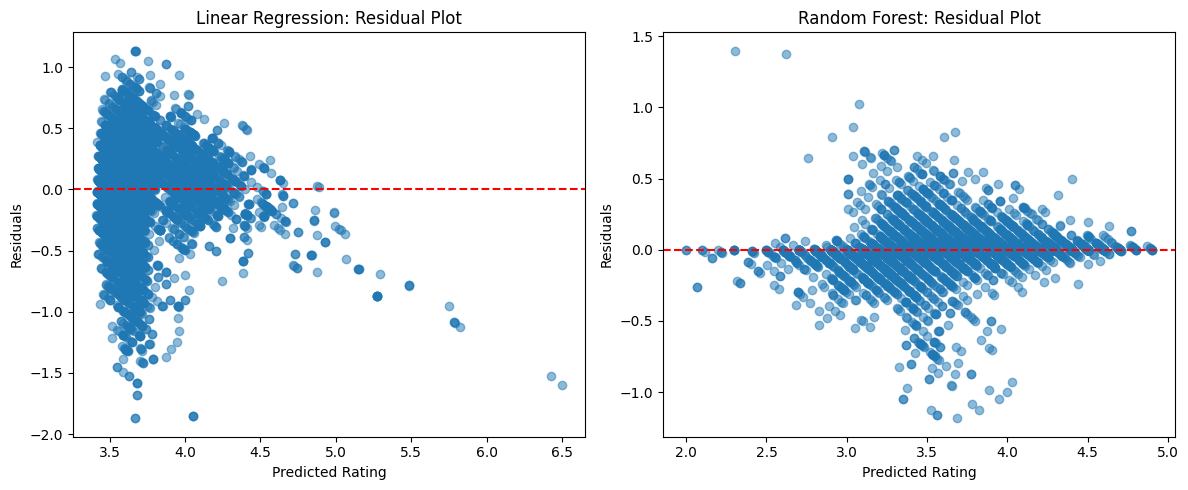

In [138]:
# Residual plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
lr_residuals = y_test - lr_pred
plt.scatter(lr_pred, lr_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Linear Regression: Residual Plot')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
rf_residuals = y_test - rf_pred
plt.scatter(rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Random Forest: Residual Plot')
plt.xlabel('Predicted Rating')
plt.ylabel('Residuals')
plt.tight_layout()
plt.savefig('restaurant_residual_plots.png')
plt.show()

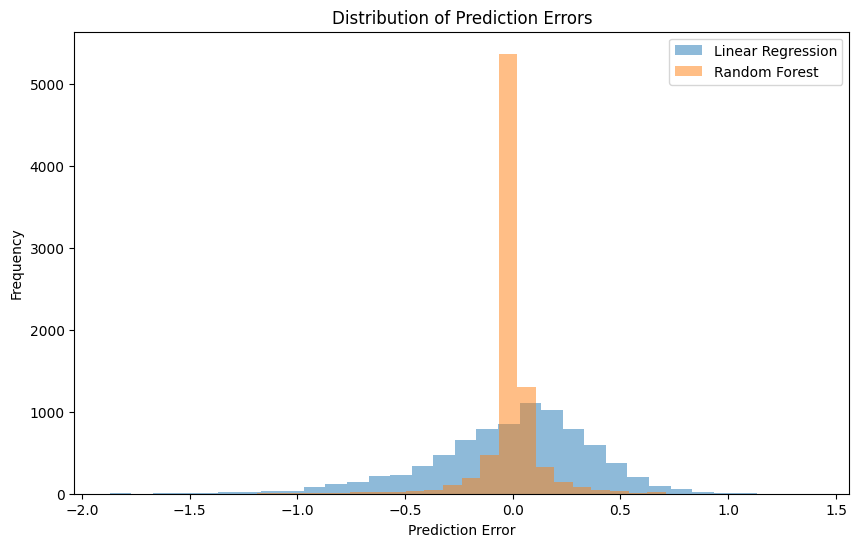

In [139]:
# Error Distribution
plt.figure(figsize=(10, 6))
plt.hist(lr_residuals, bins=30, alpha=0.5, label='Linear Regression')
plt.hist(rf_residuals, bins=30, alpha=0.5, label='Random Forest')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('restaurant_error_distribution.png')
plt.show()